### Multiple Linear Regression Assumptions Checking

Multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables.

This notebook analyzes a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. The business is hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, we will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

- Exploring and cleaning data
- Using plots and descriptive statistics to select the independent variables
- Creating a fitting multiple linear regression model
- Checking model assumptions
- Interpreting model outputs and communicating the results to non-technical stakeholders

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv('marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


#### Data exploration

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Nano," and "Micro" categories)

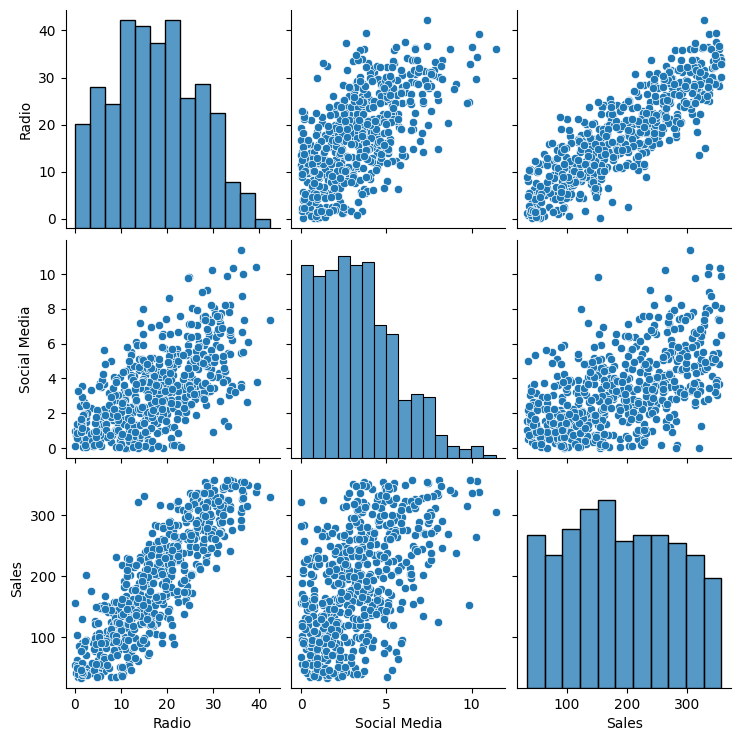

In [3]:
sns.pairplot(data)
plt.show()

`Radio` and `Social Media` both appear to have linear relationships with `Sales`. Given this, `Radio` and `Social Media` may be useful as independent variables in a multiple linear regression model estimating `Sales`. 

`TV` and `Influencer` are excluded from the pairplot because they are not numeric. 

In [4]:
data['TV'].value_counts()

TV
Medium    205
Low       201
High      166
Name: count, dtype: int64

In [5]:
data['Influencer'].value_counts()

Influencer
Nano     157
Micro    151
Mega     137
Macro    127
Name: count, dtype: int64

In [6]:
print(data.groupby('TV')['Sales'].mean())
print('')
print(data.groupby('Influencer')['Sales'].mean())
print('')

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64

Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64



The average Sales for High TV promotions is considerably higher than for Medium and Low TV promotions. TV may be a strong predictor of Sales.

The categories for Influencer have different average Sales, but the variation is not substantial. Influencer may be a weak predictor of Sales.

These results can be investigated further when fitting the multiple linear regression model.

In [7]:
data = data.dropna(axis=0)
data = data.rename(columns={'Social Media':'Social_Media'})
data.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

#### Model Building

In [8]:
ols_formula = 'Sales ~ C(TV) + Radio'
OLS = ols(formula = ols_formula, data=data)
model = OLS.fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Sun, 25 Jun 2023   Prob (F-statistic):          1.63e-288
Time:                        16:28:09   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Variables selected:

- TV was selected, as the preceding analysis showed a strong relationship between the TV promotional budget and the average Sales.
- Radio was selected because the pairplot showed a strong linear relationship between Radio and Sales.
- Social Media was not selected because it was determined to be correlated with another independent variable: Radio.
- Influencer was not selected because it did not show a strong relationship to Sales in the preceding analysis.

#### Checking Model Assumptions

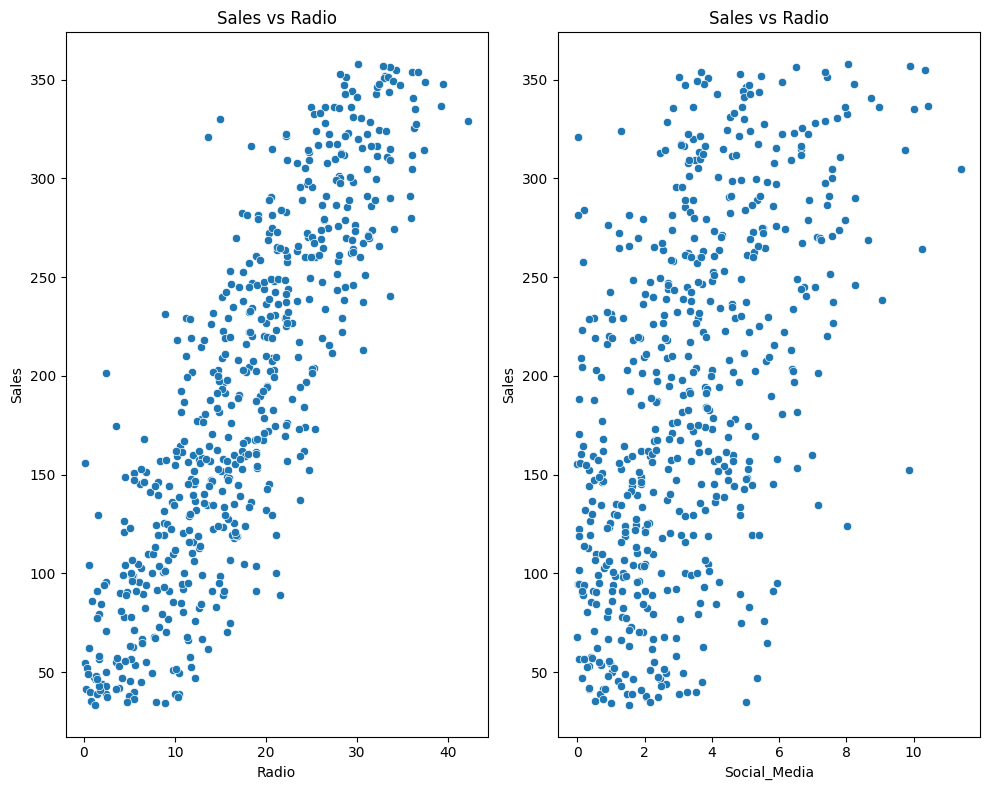

In [9]:
#Linearity
fig, axes = plt.subplots(1, 2, figsize = (10,8))
sns.scatterplot(x = data['Radio'], y = data['Sales'], ax = axes[0])
axes[0].set_title('Sales vs Radio')

sns.scatterplot(x = data['Social_Media'], y = data['Sales'], ax = axes[1])
axes[1].set_title('Sales vs Radio')
plt.tight_layout()
plt.show()

The linearity assumption holds for Radio, as there is a clear linear relationship in the scatterplot between Radio and Sales. Social Media was not included in the preceding multiple linear regression model, but it does appear to have a linear relationship with Sales.

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

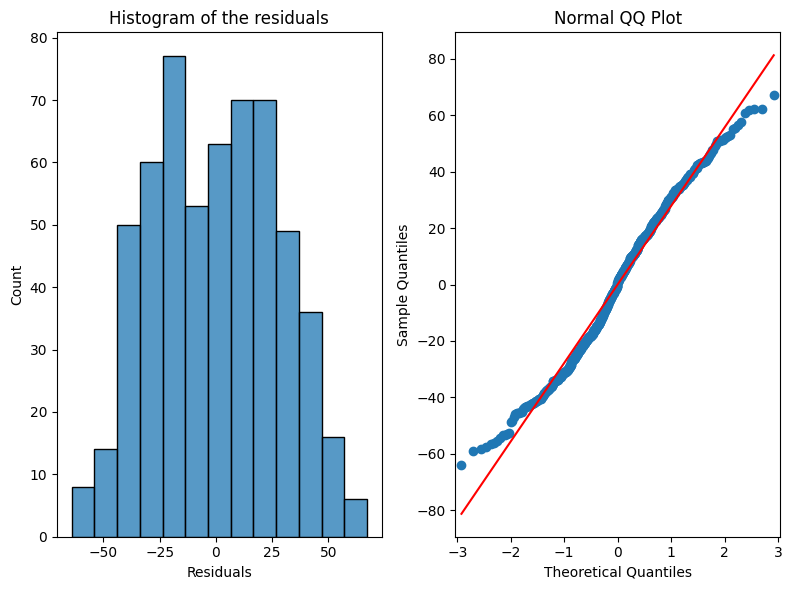

In [10]:
# Normality of Residuals

residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize = (8, 6))
sns.histplot(residuals, ax = axes[0])
axes[0].set_title('Histogram of the residuals')
axes[0].set_xlabel('Residuals')
sm.qqplot(residuals, line = 's', ax = axes[1])
axes[1].set_title("Normal QQ Plot")
plt.tight_layout()
plt.show()

The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model. The residuals in the Q-Q plot form a straight line, further supporting that this assumption is met.

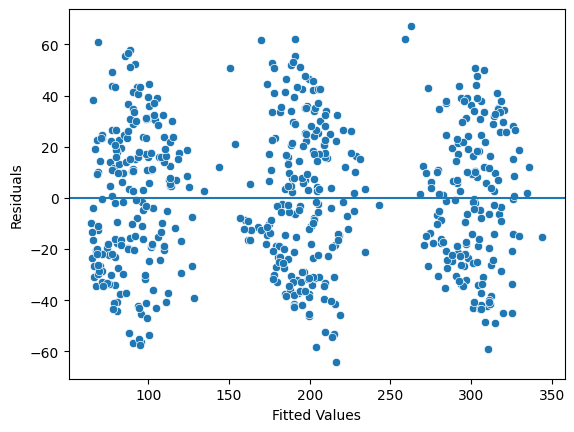

In [11]:
#Homoscedasticity of residuals

fig = sns.scatterplot(x = model.fittedvalues, y = residuals)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
fig.axhline(0)
plt.show()

The fitted values are in three groups because the categorical variable is dominating in this model, meaning that TV is the biggest factor that decides the sales. However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

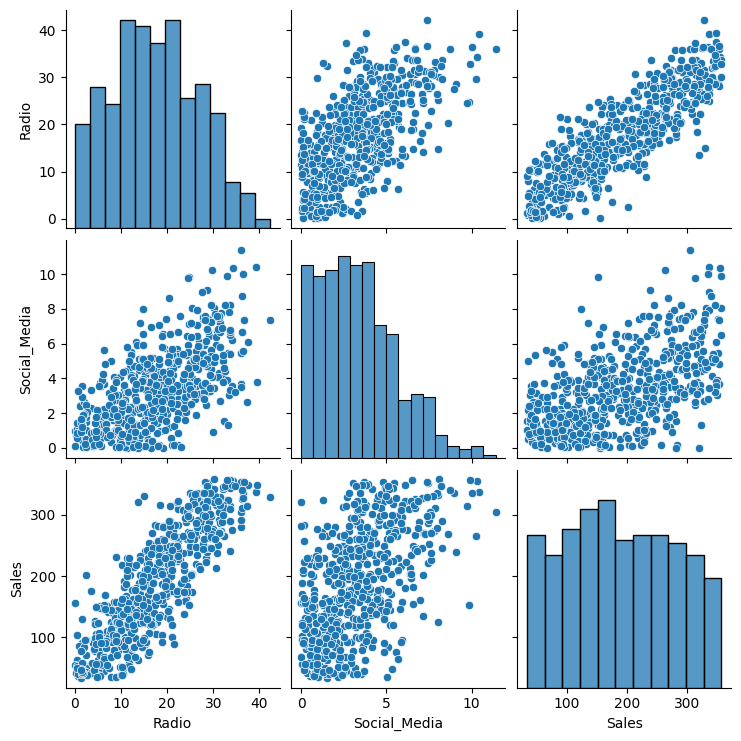

In [12]:
#No multicollinearity
sns.pairplot(data)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = data[['Radio','Social_Media']]

vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

df_vif = pd.DataFrame(vif, index = x.columns, columns = ['variance inflation factor'])
df_vif

,variance inflation factor
Radio,5.170922
Social_Media,5.170922


The preceding model only has one continous independent variable, meaning there are no multicollinearity issues.

If a model used both Radio and Social_Media as predictors, there would be a moderate linear relationship between Radio and Social_Media that violates the multicollinearity assumption. Furthermore, the variance inflation factor when both Radio and Social_Media are included in the model is 5.17 for each variable, indicating high multicollinearity.

In [14]:
#Model Results
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Sun, 25 Jun 2023   Prob (F-statistic):          1.63e-288
Time:                        16:28:09   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using `TV` and `Radio` as the independent variables results in a multiple linear regression model with $R^{2} = 0.904$. In other words, the model explains $90.4\%$ of the variation in `Sales`. This makes the model an excellent predictor of `Sales`. 

When `TV` and `Radio` are used to predict `Sales`, the model coefficients are:

* $\beta_{0} =  218.5261$
* $\beta_{TVLow}= -154.2971$
* $\beta_{TVMedium} = -75.3120$
* $\beta_{Radio} =  2.9669$

$\text{Sales} = \beta_{0} + \beta_{1}*X_{1}+ \beta_{2}*X_{2}+ \beta_{3}*X_{3}$

$\text{Sales} = \beta_{0} + \beta_{TVLow}*X_{TVLow}+ \beta_{TVMedium}*X_{TVMedium}+ \beta_{Radio}*X_{Radio}$

$\text{Sales} = 218.5261 - 154.2971*X_{TVLow} - 75.3120*X_{TVMedium}+ 2.9669 *X_{Radio}$

The default `TV` category for the model is `High` since there are coefficients for the other two `TV` categories, `Medium` and `Low`. Because the coefficients for the `Medium` and `Low` `TV` categories are negative, that means the average of sales is lower for `Medium` or `Low` `TV` categories compared to the `High` `TV` category when `Radio` is at the same level.

For example, the model predicts that a `Low` `TV` promotion is 154.2971 lower on average compared to a `high` `TV` promotion given the same `Radio` promotion.

The coefficient for `Radio` is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. 

For example, there is a $95\%$ chance that the interval $[-163.979,-144.616]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a `Low` `TV` promotion is chosen instead of a `High` `TV` promotion.

#### Results Interpretation
According to the model, high TV promotional budgets result in significantly more sales than medium and low TV promotional budgets. For example, the model predicts that a Low TV promotion is 154.2971 lower on average than a high TV promotion given the same Radio promotion.

The coefficient for radio is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is 0.000, meaning all coefficients are statistically significant at 𝑝=0.05. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders.

For example, there is a 95% chance the interval [−163.979,−144.616] contains the true parameter of the slope of 𝛽𝑇𝑉𝐿𝑜𝑤, which is the estimated difference in promotion sales when a low TV promotional budget is chosen instead of a high TV promotion budget.

High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by $\$75.3120$ million (95% CI $[-82.431,-68.193])$, and switching from a high to low TV promotional budget reduces sales by $\$154.297$ million (95% CI $[-163.979,-144.616])$. The model also estimates that an increase of $\$1$ million in the radio promotional budget will yield a $\$2.9669$ million increase in sales (95% CI $[2.551,3.383]$).

Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales. 

### Hypothesis testing

Analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, we will use the data to run a one-way ANOVA and a post hoc ANOVA test. 
In this dataset, each row corresponds to an independent marketing promotion, where a business uses TV, social media, radio, and influencer promotions to increase sales. Now we want to know if sales are significantly different among various TV and influencer promotion types.

To address this, a one-way ANOVA test will enable us to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs

In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

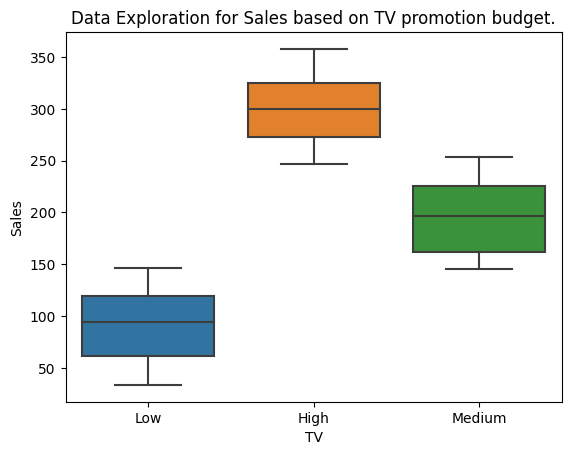

In [19]:
sns.boxplot(x = data['TV'],y = data['Sales']).set(title='Data Exploration for Sales based on TV promotion budget.')
plt.show()

There is considerable variation in Sales across the TV groups. The significance of these differences can be tested with a one-way ANOVA.

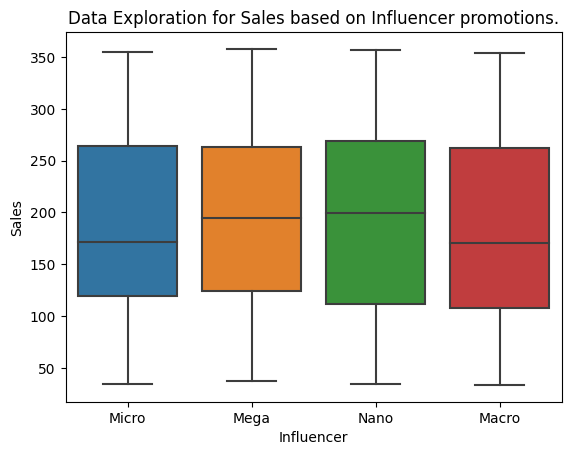

In [21]:
sns.boxplot(x=data['Influencer'],y=data['Sales']).set(title='Data Exploration for Sales based on Influencer promotions.')
plt.show()

There is some variation in Sales across the Influencer groups, but it may not be significant.

In [24]:
ols_formula = 'Sales ~ C(TV)'
OLS = ols(formula = ols_formula, data = data)
model = OLS.fit()
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1918.
Date:                Sun, 25 Jun 2023   Prob (F-statistic):          1.38e-253
Time:                        16:38:17   Log-Likelihood:                -2798.9
No. Observations:                 572   AIC:                             5604.
Df Residuals:                     569   BIC:                             5617.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.8532      2.512    119.789      0.000     295.920     305.786
C(TV)[T.Low]     -209.8691      3.394    -61.841      0.000    -216.535    -203.203
C(TV)[T.Medium]  -105.4952      3.379    -31.224      0.000    -112.131     -98.859
==============================================================================
Omnibus:                      547.584   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.103
Skew:                           0.015   Prob(JB):                     8.77e-09
Kurtosis:                       1.753   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* `TV` was selected as the preceding analysis showed a strong relationship between the `TV` promotion budget and the average `Sales`.
* `Influencer` was not selected because it did not show a strong relationship to `Sales` in the analysis.

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

- The null hypothesis $H_0$ is that there is no difference in Sales based on the TV promotion budget.
- The alternative hypothesis $H_1$ is that there is a difference in Sales based on the TV promotion budget.

In [27]:
sm.stats.anova_lm(model,typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.0,4.016116e+06,2.008058e+06,1917.749265,1.383230e-253
Residual,569.0,5.957948e+05,1.047091e+03,NaN,NaN


The F-test statistic is 1971.492 and the p-value is $1.38 * 10^{-253}$ (i.e., very small). Because the p-value is less than 0.05, we reject the null hypothesis that there is no difference in `Sales` based on the `TV` promotion budget. This means that there is a difference in `Sales` based on the `TV` promotion budget. 

The results of the one-way ANOVA test indicate that you can reject the null hypothesis in favor of the alternative hypothesis. There is a statistically significant difference in Sales among TV groups.

### Perform an ANOVA post hoc test

If there is a significant results from the one-way ANOVA test, we can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test.

In [28]:
tukeyhsd_1way = pairwise_tukeyhsd(endog = data['Sales'], groups = data['TV'])
tukeyhsd_1way.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-209.8691,0.0,-217.8438,-201.8944,True
High,Medium,-105.4952,0.0,-113.4346,-97.5557,True
Low,Medium,104.3739,0.0,96.8261,111.9218,True


The first row, which compares the `High` and `Low` `TV` groups, indicates that we can reject the null hypothesis that there is no significant difference between the `Sales` of these two groups.

We can also reject the null hypotheses for the two other pairwise comparisons that compare `High` to `Medium` and `Low` to `Medium`.

A post hoc test was conducted to determine which `TV` groups are different and how many are different from each other. This provides more detail than the one-way ANOVA results, which can at most determine that at least one group is different. Further, using the Tukey HSD controls for the increasing probability of incorrectly rejecting a null hypothesis from peforming multiple tests. 

The results were that `Sales` is not the same between any pair of `TV` groups. 